In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Position_Salaries.csv")

In [4]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [7]:
df.shape

(10, 3)

In [8]:
# Fixing decimals, lets see the answers
df = df.round(0)

In [9]:
# Making Y-Variable
y = df['Salary']

Xs = df.drop(['Salary', 'Position'], axis=1)

In [10]:
# We are going to compare the linear regression with poly regression to check the comparsion of both model
# and then we will cehck i fthere's an acutal difference btw both models

In [19]:
from sklearn.linear_model import LinearRegression

# linear regression
linreg = LinearRegression()
linreg.fit(Xs, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# We are transforming the variables in the X to poly features to the degree 
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree=2)
X_poly = polyreg.fit_transform(Xs)

linreg_2 = LinearRegression()
linreg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

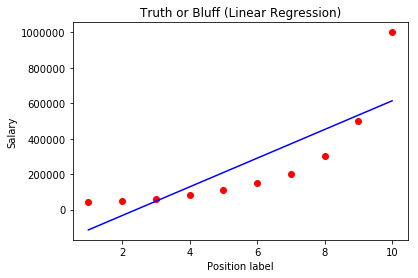

In [21]:
# Visualizing the results 
plt.scatter(Xs, y, c='red')
plt.plot(Xs, linreg.predict(Xs), c='blue')
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

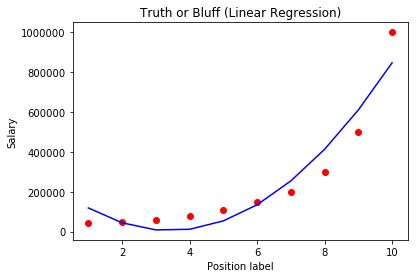

In [25]:
# Visualizing the results 
plt.scatter(Xs, y, c='red')
plt.plot(Xs, linreg_2.predict(X_poly), c='blue')
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

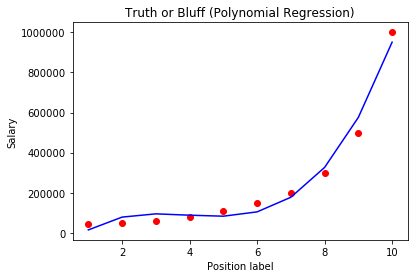

In [26]:
# Visualizing the results 

polyreg = PolynomialFeatures(degree=3)
Xpoly_3 = polyreg.fit_transform(Xs)

linreg_3 = LinearRegression()
linreg_3.fit(Xpoly_3, y)

plt.scatter(Xs, y, c='red')
plt.plot(Xs, linreg_3.predict(Xpoly_3), c='blue')
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel('Position label')
plt.ylabel('Salary')
plt.show()

In [48]:
# Predictions
print("$ {0:.2f} using the linear regression".format(linreg.predict(6.5)[0]))

val = polyreg.fit_transform(6.5)
print("$ {0:.2f} using the polynomial regression with the second degree".format(linreg_2.predict(val)[0]))

$ 330378.79 using the linear regression
$ 189498.11 using the polynomial regression with the second degree
